<a href="https://colab.research.google.com/github/Toni2Morales/PrediccionyAnalisisDeVinos/blob/main/src/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción y análisis de vinos

## Clonamos el repositorio

In [2]:
!git clone https://github.com/Toni2Morales/PrediccionyAnalisisDeVinos.git

fatal: destination path 'PrediccionyAnalisisDeVinos' already exists and is not an empty directory.


## Importamos las librerías

In [127]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00

In [133]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from pycaret.classification import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
os.getcwd()

'/content'

In [5]:
os.chdir("PrediccionyAnalisisDeVinos/src/notebooks")
os.getcwd()

'/content/PrediccionyAnalisisDeVinos/src/notebooks'

## Leemos los datos

In [6]:
data1 = pd.read_csv("../data/winemag-data-130k-v2.csv", index_col = 0)
data2 = pd.read_csv("../data/winemag-data_first150k.csv", index_col = 0)
data3 = pd.read_json("../data/winemag-data-130k-v2.json")

In [7]:
data1

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [8]:
data2

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [9]:
data3

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,90,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Anna Lee C. Iijima,None,28.0,Brauneberger Juffer-Sonnenuhr Spätlese,Riesling,None,None,Mosel,Germany,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,90,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,Paul Gregutt,@paulgwine,75.0,None,Pinot Noir,Oregon,Oregon Other,Oregon,US,Citation
129968,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Roger Voss,@vossroger,30.0,Kritt,Gewürztraminer,Alsace,None,Alsace,France,Domaine Gresser
129969,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",Roger Voss,@vossroger,32.0,None,Pinot Gris,Alsace,None,Alsace,France,Domaine Marcel Deiss


## Limpieza de datos

In [10]:
data = pd.concat([data1, data2, data3], ignore_index = True)

In [11]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410867,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,None,None,Anna Lee C. Iijima,None,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
410868,US,Citation is given as much as a decade of bottl...,None,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
410869,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,None,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
410870,France,"A dry style of Pinot Gris, this is crisp with ...",None,90,32.0,Alsace,Alsace,None,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410872 entries, 0 to 410871
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                410741 non-null  object 
 1   description            410872 non-null  object 
 2   designation            290207 non-null  object 
 3   points                 410872 non-null  int64  
 4   price                  379185 non-null  float64
 5   province               410741 non-null  object 
 6   region_1               343318 non-null  object 
 7   region_2               161975 non-null  object 
 8   taster_name            207454 non-null  object 
 9   taster_twitter_handle  197516 non-null  object 
 10  title                  259942 non-null  object 
 11  variety                410870 non-null  object 
 12  winery                 410872 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 40.8+ MB


## Escogiendo la variable target

In [13]:
data.shape

(410872, 13)

In [14]:
len(data["title"].unique())

118842

In [15]:
data.shape[0]/len(data["title"].unique())

3.4572962420693023

#### Hay demasiada varianza en el tipo de vino como para predecirlo con respecto a su descripción, escogamos otro target. Si escogieramos el nombre dle vino para usarlo como nuestra variable target nuestro modelo solo tendría aproximadamente 4 registros para aprender a diferenciar entre todos los tipos de vinos.

In [16]:
len(data["variety"].unique())

758

In [17]:
data.shape[0]/len(data["variety"].unique())

542.0474934036939

## Vamos a escoger la variable "variety" para que sea nuestra variable target a la hora de entrenar el modelo.

## Missing Values

In [18]:
data.isnull().sum()

country                     131
description                   0
designation              120665
points                        0
price                     31687
province                    131
region_1                  67554
region_2                 248897
taster_name              203418
taster_twitter_handle    213356
title                    150930
variety                       2
winery                        0
dtype: int64

#### Las columnas con más valores nulos son region_2 y taster_twitter_handle que son columnas que no nos dan demasiada información relevante así que las vamos a eliminar. También elimnaremos la columna de region_1

In [19]:
data.drop(columns = ["region_2","taster_twitter_handle", "region_1"], inplace = True)

In [20]:
data.isnull().sum()

country           131
description         0
designation    120665
points              0
price           31687
province          131
taster_name    203418
title          150930
variety             2
winery              0
dtype: int64

In [21]:
data.dropna(inplace = True)

In [22]:
data.shape

(139838, 10)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139838 entries, 1 to 410871
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      139838 non-null  object 
 1   description  139838 non-null  object 
 2   designation  139838 non-null  object 
 3   points       139838 non-null  int64  
 4   price        139838 non-null  float64
 5   province     139838 non-null  object 
 6   taster_name  139838 non-null  object 
 7   title        139838 non-null  object 
 8   variety      139838 non-null  object 
 9   winery       139838 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.7+ MB


#### Ya no tenemos valores nulos. Vamos a comenzar con el análisis de los datos.

In [24]:
len(data["variety"].unique())

598

In [25]:
data.shape[0]/len(data["variety"].unique())

233.8428093645485

In [26]:
data.reset_index(drop = True, inplace = True)

## Análisis

In [27]:
data["country"].unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'Germany', 'France',
       'Argentina', 'Chile', 'Australia', 'South Africa', 'Israel',
       'Hungary', 'Austria', 'Greece', 'Canada', 'Mexico', 'New Zealand',
       'Romania', 'Slovenia', 'Luxembourg', 'Georgia', 'Uruguay',
       'England', 'Lebanon', 'Brazil', 'Moldova', 'Czech Republic',
       'Peru', 'India', 'Bulgaria', 'Cyprus', 'Turkey', 'Armenia',
       'Croatia', 'Morocco', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Serbia', 'Macedonia', 'China'], dtype=object)

#### Tenemos estos países en donde se realizaron las catas de vinos

In [28]:
len(data["designation"].unique())

30338

In [29]:
len(data["province"].unique())

399

#### Tenemos 399 provincias distintas

In [30]:
len(data["taster_name"].unique())

19

#### Tenemos 19 probadores de vinos

In [31]:
len(data["title"].unique())

63453

#### Tenemos 63453 vinos distintos

In [32]:
len(data["variety"].unique())

598

In [33]:
len(data["winery"].unique())

10307

<ipython-input-34-7487cee11004>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["points"], bins = 50, kde = False)


<Axes: xlabel='points'>

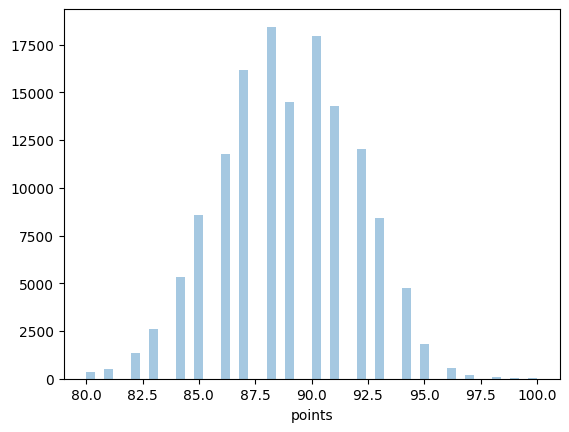

In [34]:
sns.distplot(data["points"], bins = 50, kde = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6c22de2ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6c22de3430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6c22de2c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6c22de3970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6c22de3c10>],
 'means': []}

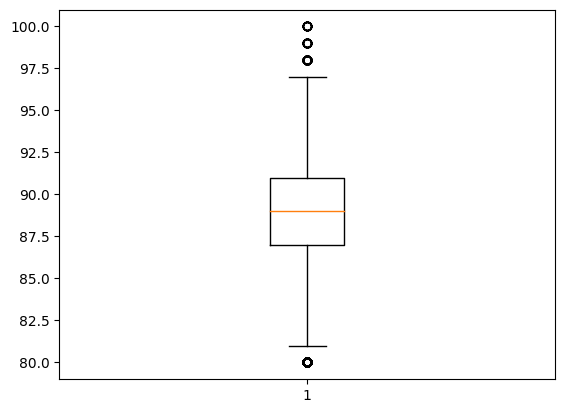

In [35]:
plt.boxplot(data['points'])

#### Observamos que los valores del puntaje de los vinos se concentran entre 87 y 91. Tenemos algunos datos atípucos pero no demasiados. No se salen de valores que puedan ser válidos a la hora de puntuar un vino (0-100)

In [36]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'taster_name', 'title', 'variety', 'winery'],
      dtype='object')

In [37]:
data["taster_name"].value_counts()

Roger Voss            28736
Michael Schachner     24212
Kerin O’Keefe         13846
Virginie Boone        13478
Paul Gregutt          12918
Matt Kettmann          9018
Sean P. Sullivan       7032
Anna Lee C. Iijima     6938
Joe Czerwinski         6678
Anne Krebiehl MW       5770
Jim Gordon             5312
Lauren Buzzeo          2302
Susan Kostrzewa        1342
Mike DeSimone           762
Jeff Jenssen            728
Alexander Peartree      536
Carrie Dykes            192
Fiona Adams              34
Christina Pickard         4
Name: taster_name, dtype: int64

#### Roger Voss es el catador de vinos del que más catas tenemos registradas


<ipython-input-38-1f756df288d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

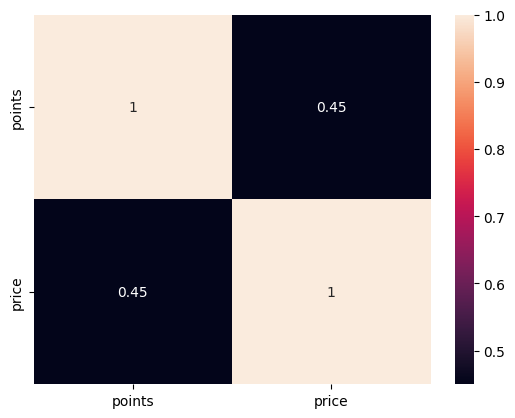

In [38]:
sns.heatmap(data.corr(), annot = True)

## Vemos que el precio del vino tiene cierta correlación con su puntuación pero no tanta como se esperaría

## Transformación de los datos

### Dividimos entre X e Y

In [39]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'taster_name', 'title', 'variety', 'winery'],
      dtype='object')

In [40]:
dataDef = data.copy()

In [41]:
dataDef.drop(columns=["country", "designation","points" ,"price", "province", "taster_name", "title","winery"], inplace = True)

In [42]:
dataDef

,description,variety
0,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
1,"Pineapple rind, lemon pith and orange blossom ...",Riesling
2,"Much like the regular bottling from 2012, this...",Pinot Noir
3,Blackberry and raspberry aromas show a typical...,Tempranillo-Merlot
4,"Here's a bright, informal red that opens with ...",Frappato
...,...,...
139833,"A bouquet of black cherry, tart cranberry and ...",Cabernet Sauvignon
139834,"While it's rich, this beautiful dry wine also ...",Pinot Gris
139835,Notes of honeysuckle and cantaloupe sweeten th...,Riesling
139836,Well-drained gravel soil gives this wine its c...,Gewürztraminer


In [43]:
x = data["description"]
y = data["variety"]

### Trabajamos con el texto

#### Eliminamos caracteres innecesarios

In [44]:
x = x.str.replace(r"(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))","", regex = True)

In [45]:
"(<br\s*/><br\s*/>)|(\-)|(\/)"

'(<br\\s*/><br\\s*/>)|(\\-)|(\\/)'

In [46]:
x = x.str.replace(r"(<br\s*/><br\s*/>)|(\-)|(\/)","", regex = True)

In [47]:
x

0         This is ripe and fruity a wine that is smooth ...
1         Pineapple rind lemon pith and orange blossom s...
2         Much like the regular bottling from 2012 this ...
3         Blackberry and raspberry aromas show a typical...
4         Here's a bright informal red that opens with a...
                                ...                        
139833    A bouquet of black cherry tart cranberry and c...
139834    While it's rich this beautiful dry wine also o...
139835    Notes of honeysuckle and cantaloupe sweeten th...
139836    Welldrained gravel soil gives this wine its cr...
139837    Big rich and offdry this is powered by intense...
Name: description, Length: 139838, dtype: object

In [48]:
lemmatizer = WordNetLemmatizer()

In [49]:
def lemmatize_func(row):
  new_row = []
  for word in row.split():
    new_row.append(lemmatizer.lemmatize(word))
  return new_row

In [50]:
new_x = []
for row in x.values:
  new_x.append(lemmatize_func(row))

In [51]:
" ".join(new_x[0])

"This is ripe and fruity a wine that is smooth while still structured Firm tannin are filled out with juicy red berry fruit and freshened with acidity It's already drinkable although it will certainly be better from 2016"

In [52]:
x = [" ".join(text)for text in new_x]
x = np.array(x)

In [53]:
x

array(["This is ripe and fruity a wine that is smooth while still structured Firm tannin are filled out with juicy red berry fruit and freshened with acidity It's already drinkable although it will certainly be better from 2016",
       'Pineapple rind lemon pith and orange blossom start off the aroma The palate is a bit more opulent with note of honeydrizzled guava and mango giving way to a slightly astringent semidry finish',
       "Much like the regular bottling from 2012 this come across a rather rough and tannic with rustic earthy herbal characteristic Nonetheless if you think of it a a pleasantly unfussy country wine it's a good companion to a hearty winter stew",
       ...,
       "Notes of honeysuckle and cantaloupe sweeten this deliciously featherlight spätlese It's intensely juicy quenching the palate with stream of tart tangerine and grapefruit acidity yet wrap up with a kiss of honey and peach",
       'Welldrained gravel soil give this wine it crisp and dry character It 

In [54]:
english_stop_words = stopwords.words('english')

In [55]:
vectorizer = CountVectorizer(stop_words = english_stop_words)
vector = vectorizer.fit_transform(x)

In [56]:
len(vectorizer.get_feature_names_out())

29141

In [57]:
x = pd.DataFrame(vector.toarray(),columns = vectorizer.get_feature_names_out())

In [58]:
x

,01,02,03,04,05,053,06,07,07s,08,...,über,überaromatic,überbest,überconsultant,überfresh,überreserve,überrestrained,übersimple,ürzig,ürziger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dividimos entre train y test

## Tuve que restar los registros a la mitad por limitaciones del equipo

In [120]:
x = x[:60000]
y = y[:60000]

In [121]:
xtrain, xtest , ytrain, ytest= train_test_split(x, y ,shuffle = True, test_size = 0.2, random_state = 2)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf = RandomForestClassifier()

In [124]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [125]:
metrics.accuracy_score(ytest, rf.predict(xtest))

0.417

#### Parece que no tiene la precisión que esprábamos, vamos a probar más modelos con PyCaret

In [129]:
data = x.copy()
data["target"] = y

In [132]:
clf1 = setup(data, target = 'target', session_id=123, log_experiment=True, experiment_name='Wine')

ImportError: ignored